In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
b1 = pd.read_csv("Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")
b2 = pd.read_csv("Data/Bumblebee_data_Marshall_et_al_2020.csv")
plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
print(b1.shape)
print(b2.shape)
print(plants.shape)

(854, 11)
(911, 8)
(1699, 9)


In [7]:
# Lire un fichier CSV compressé en Gzip
data_1863_1949 = pd.read_csv("Data/Q_65_1863-1949_RR-T-Vent.csv.gz",sep=';')
data_1950_2023 = pd.read_csv("Data/Q_65_previous-1950-2023_RR-T-Vent.csv.gz",sep=';')

data_1950_2023['AAAAMMJJ'] = pd.to_datetime(data_1950_2023['AAAAMMJJ'], format='%Y%m%d')


# Filtrer les entrées où l'année est <= 2006 pour être en accord avec l'article des bourdons 
data_1950_2006 = data_1950_2023[data_1950_2023['AAAAMMJJ'].dt.year <= 2006]

# Compter le nombre d'entrées correspondantes
nombre_entrees = data_1950_2006.shape[0]

print(f"Nombre d'entrées entre 1950 et 2006 : {nombre_entrees}")
print(data_1950_2023.shape)

Nombre d'entrées entre 1950 et 2006 : 646571
(864881, 58)


In [ ]:
# On separe les noms des listes en qualités et données
qualite = ['QRR', 'QTN', 'QHTN', 'QTX', 'QHTX', 'QTM', 'QTNTXM', 'QTAMPLI', 'QTM', 'QTNSOL', 'QTN50', 'QDG', 'QFFM', 'QFF2M', 'QFXY', 'QDXY', 'QHXY', 'QFXI', 'QDXI','QHXI', 
           'QFXI2', 'QDXI2', 'QHXI2', 'QFXI3S', 'QDXI3S', 'QHXI3S', 'QDRR']

donnees = [col for col in data_1863_1949.columns if col not in qualite]

print(f'donnees: {donnees}')
print(f'qualite: {qualite}')                                                        

donnees: ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL', 'TN50', 'DG', 'FFM', 'FF2M', 'FXY', 'DXY', 'HXY', 'FXI', 'DXI', 'HXI', 'FXI2', 'DXI2', 'HXI2', 'FXI3S', 'DXI3S', 'HXI3S', 'DRR']
qualite: ['QRR', 'QTN', 'QHTN', 'QTX', 'QHTX', 'QTM', 'QTNTXM', 'QTAMPLI', 'QTM', 'QTNSOL', 'QTN50', 'QDG', 'QFFM', 'QFF2M', 'QFXY', 'QDXY', 'QHXY', 'QFXI', 'QDXI', 'QHXI', 'QFXI2', 'QDXI2', 'QHXI2', 'QFXI3S', 'QDXI3S', 'QHXI3S', 'QDRR']


In [4]:
b1.columns

Index(['Longitude', 'Latitude', 'Visitor', 'Plant', 'Date', 'Site', 'Data',
       'MinEle', 'MaxEle', 'EleZone', 'clim'],
      dtype='object')

In [5]:
unique_bb1 = b1["Visitor"].unique()
unique_bb2 = b2["Visitor"].unique()
unique_visitors3 = plants["Visitor"].unique()

all_unique_bb = set(unique_bb1) | set(unique_bb2)  
all_unique_bb = list(all_unique_bb)  

print(all_unique_bb)

['Bombus wurflenii', 'Bombus humilis', 'Bombus mendax', 'Bombus pascuorum', 'Bombus pratorum', 'Bombus rupestris', 'Bombus bohemicus', 'Bombus sylvarum', 'Bombus monticola', 'Bombus gerstaeckeri', 'Bombus ruderarius', 'Bombus sichelii', 'Bombus terrestris complex', 'Bombus soroeensis', 'Bombus pyrenaeus', 'Bombus mesomelas', 'Bombus quadricolor', 'Bombus sylvestris', 'Bombus hortorum', 'Bombus mucidus', 'Bombus lapidarius']


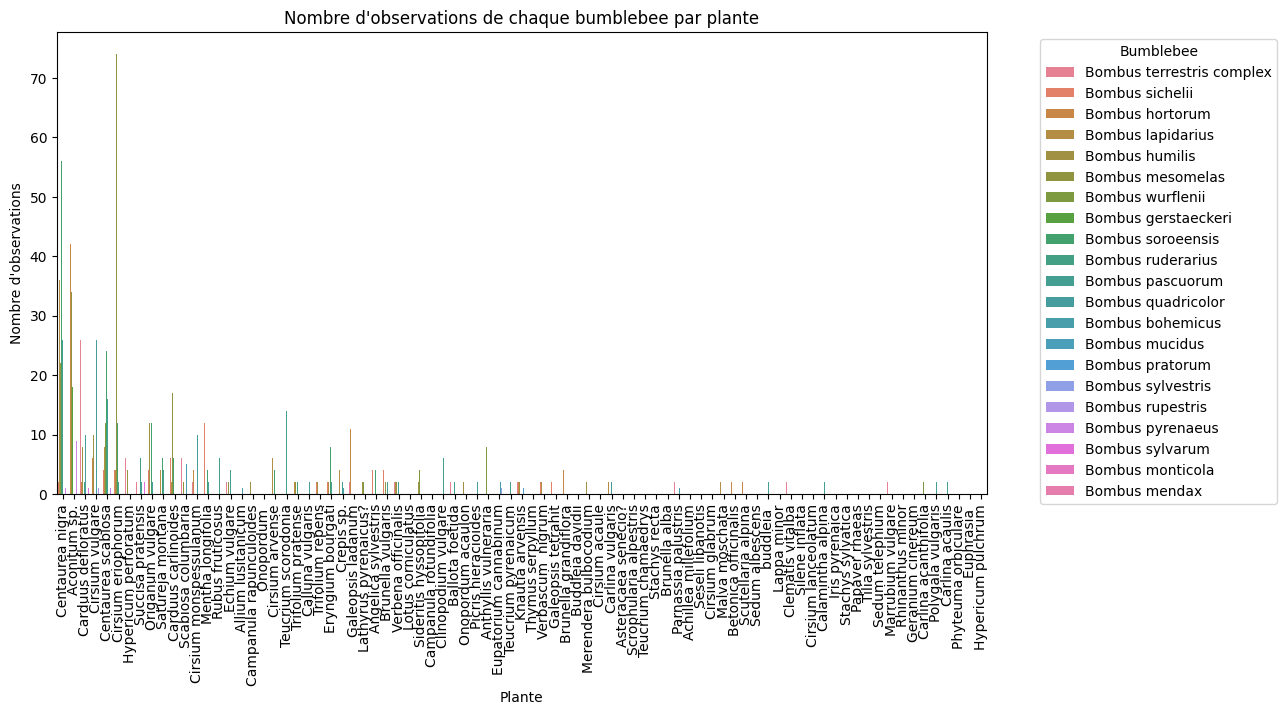

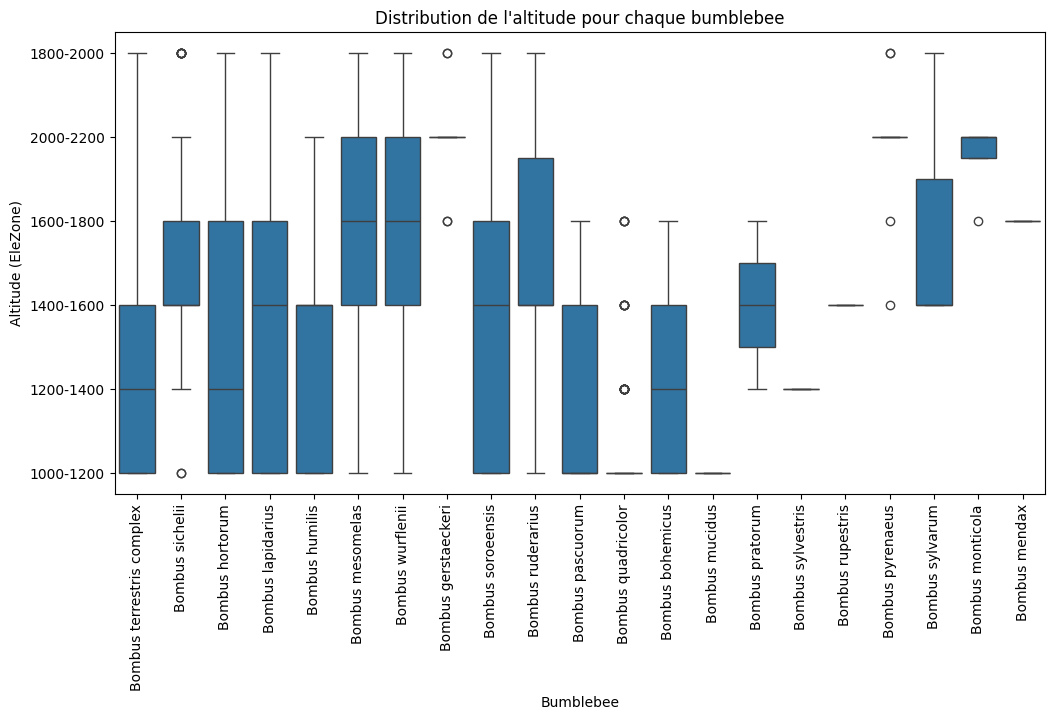

In [6]:
# Fusionner les deux datasets
df_combined = pd.concat([b1, b2])

# --- Premier graphique : Nombre d'observations par plante pour chaque bumblebee ---
plt.figure(figsize=(12, 6))
sns.countplot(data=df_combined, x="Plant", hue="Visitor", order=df_combined["Plant"].value_counts().index)
plt.xticks(rotation=90)  # Rotation des labels pour lisibilité
plt.xlabel("Plante")
plt.ylabel("Nombre d'observations")
plt.title("Nombre d'observations de chaque bumblebee par plante")
plt.legend(title="Bumblebee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Deuxième graphique : Distribution de l'altitude (EleZone) pour chaque bumblebee ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x="Visitor", y="EleZone")
plt.xticks(rotation=90)
plt.xlabel("Bumblebee")
plt.ylabel("Altitude (EleZone)")
plt.title("Distribution de l'altitude pour chaque bumblebee")
plt.show()

/tmp/ipykernel_1060/1265560469.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_combined['Date'] = pd.to_datetime(df_combined['Date'], errors='coerce')


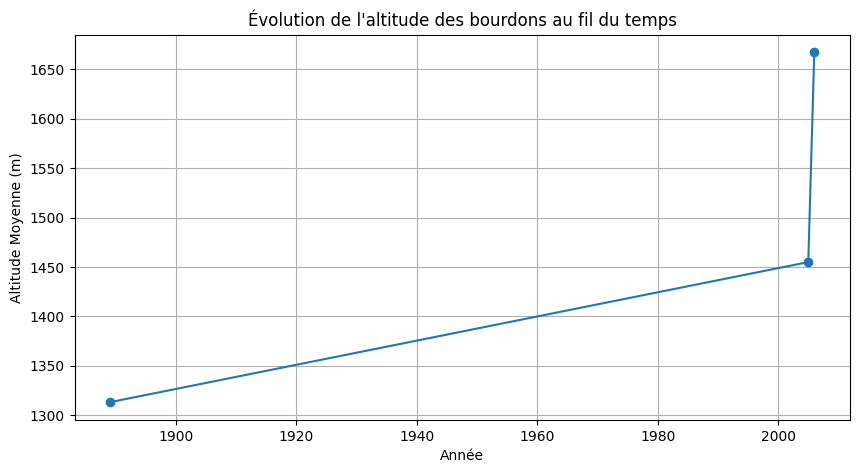

In [ ]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'], errors='coerce')

# On filtre les données avec NaN
df_valid = df_combined.dropna(subset=['Date', 'MinEle', 'MaxEle'])

# Calculer l'altitude moyenne
df_valid['MeanEle'] = (df_valid['MinEle'] + df_valid['MaxEle']) / 2

# Grouper par année pour une meilleure visualisation
df_valid['Year'] = df_valid['Date'].dt.year
df_grouped = df_valid.groupby('Year')['MeanEle'].mean()

# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')
plt.xlabel('Année')
plt.ylabel('Altitude Moyenne (m)')
plt.title("Évolution de l'altitude des bourdons au fil du temps")
plt.grid()
plt.show()


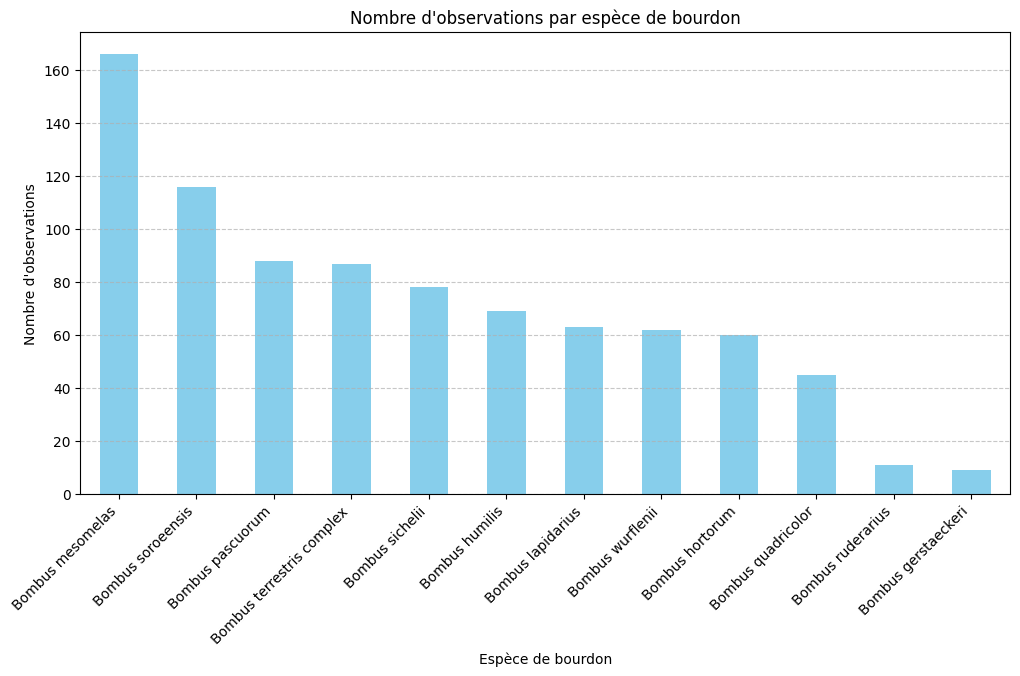

In [10]:
#Compter le nombre d'observations par espèce de bourdon
visitor_counts = b1["Visitor"].value_counts()

# Tracer le graphique
plt.figure(figsize=(12, 6))
visitor_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Espèce de bourdon")
plt.ylabel("Nombre d'observations")
plt.title("Nombre d'observations par espèce de bourdon")
plt.xticks(rotation=45, ha="right")  # Rotation des labels pour meilleure lisibilité
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()

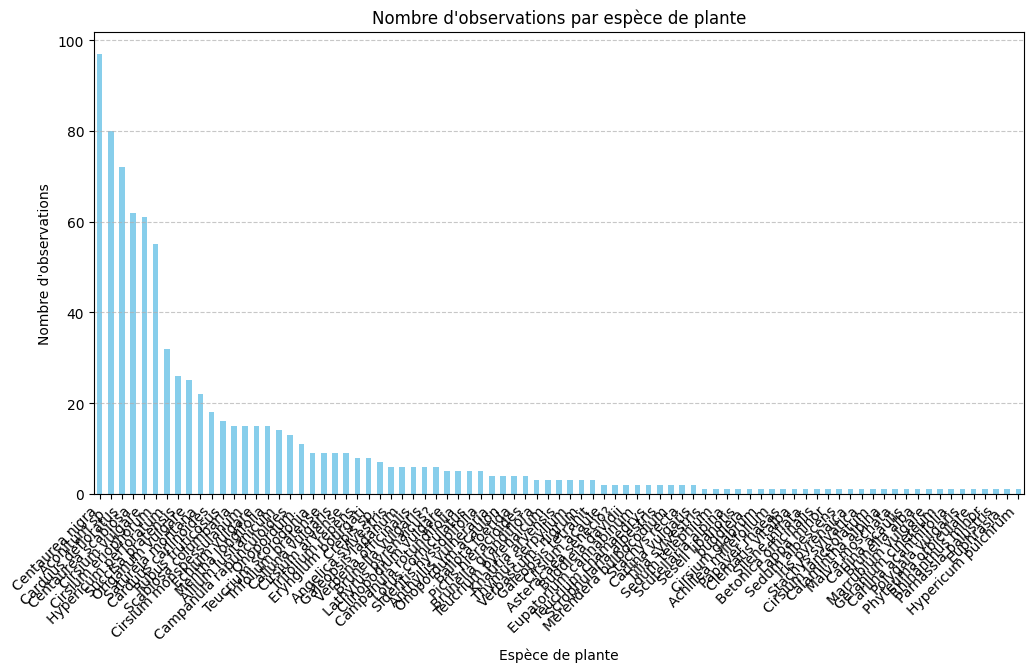

In [11]:
#Compter le nombre d'observations par espèce de bourdon
visitor_counts = b1["Plant"].value_counts()

# Tracer le graphique
plt.figure(figsize=(12, 6))
visitor_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Espèce de plante")
plt.ylabel("Nombre d'observations")
plt.title("Nombre d'observations par espèce de plante")
plt.xticks(rotation=45, ha="right")  # Rotation des labels pour meilleure lisibilité
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()